p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

EE v.s. Ctrl-: t-test independent samples with Bonferroni correction, P_val=3.014e-45 stat=1.419e+01
EE v.s. Ctrl+: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=5.608e+02


(<AxesSubplot: xlabel='Dataset', ylabel='PhyloP score'>,
  <statannot.StatResult.StatResult at 0x7fdbb7217e20>])

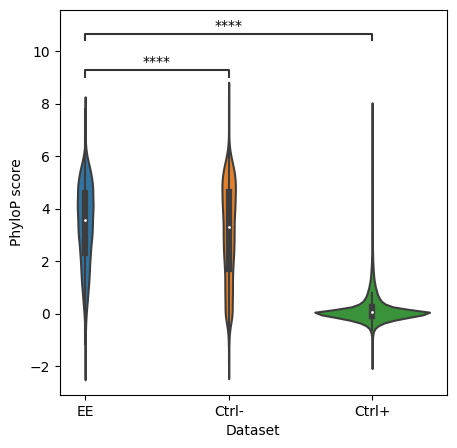

In [25]:
###violin plot 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statannot import add_stat_annotation
matplotlib.rcParams['pdf.fonttype'] = 42

ee = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/evolution_pressure/hg38_EE_phylop.bed") as file:
    for line in file:    
        ee.append(float(line.strip().split("\t")[6]))
neg = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/evolution_pressure/hg38_ctrlneg_phylop.bed") as file:
    for line in file:    
        neg.append(float(line.strip().split("\t")[6]))
pos = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/evolution_pressure/hg38_ctrlpos_phylop.bed") as file:
    for line in file:    
        pos.append(float(line.strip().split("\t")[4]))

df = pd.DataFrame({
    'PhyloP score': ee + neg + pos,
    'Dataset': ['EE']*len(ee) + ['Ctrl-']*len(neg) + ['Ctrl+']*len(pos)
})

# Plotting a violin plot
plt.figure(figsize=(5, 5))
ax = sns.violinplot(x='Dataset', y='PhyloP score', data=df, order=["EE","Ctrl-","Ctrl+"])



# Add statistical annotations
add_stat_annotation(
    ax,
    data=df,
    x='Dataset', y='PhyloP score',
    box_pairs=[("EE", "Ctrl-"), ("EE", "Ctrl+")],
    test='t-test_ind',
    text_format='star',
    loc='inside',
    verbose=1, order=["EE","Ctrl-","Ctrl+"]
)



Kruskal-Wallis H-statistic: 395.2554898362492, p-value: 1.408979745856382e-79
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 10: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.728e-35 stat=1.546e+02


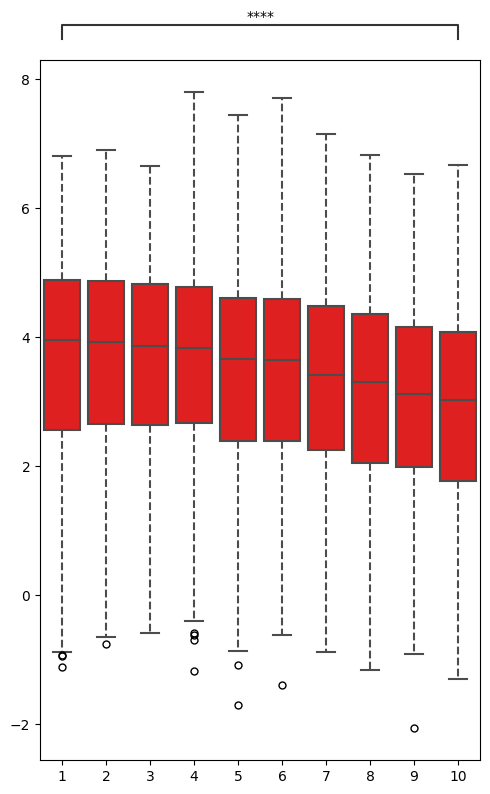

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statannot import add_stat_annotation
matplotlib.rcParams['pdf.fonttype'] = 42

df1 = pd.read_csv("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/summary_files/bilan_ee_caracteristique_hg38.tsv", sep='\t', header=0)

### Kruskal wallis test for all groups 
#PhyloP
from scipy.stats import kruskal
import pandas as pd 
import numpy as np 

df1 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_hg38.tsv", sep='\t', header=0)
data1 = df1[["GroupByTF", 'PhyloP']].dropna()
group_data = [data1[data1['GroupByTF'] == g]['PhyloP'] for g in range(1, 11)]
stat, p_value = kruskal(*group_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

### Define the columns of interest
columns_of_interest = ['PhyloP']
plt.figure(figsize=(5,8))

# Top row: Plot for first dataset (df1)
data1 = df1[["GroupByTF", 'PhyloP']].dropna()
ax = sns.boxplot(
    data=data1, 
    x='GroupByTF', 
    y='PhyloP', 
    color='red',
    showfliers=True,    
    linewidth=1.5,       
    whiskerprops={'linestyle': '--'},
    flierprops={
        'marker': 'o',        
        'markerfacecolor': 'none',  
        'markeredgecolor': 'black', 
        'markersize': 5       
    })

plt.xlabel(None)
plt.ylabel(None)


add_stat_annotation(
    ax,
    data=data1,
    x='GroupByTF',
    y='PhyloP',
    box_pairs=[(1, 10)],
    order=list(range(1, 11)),
    test='Kruskal',
    text_format='star',
    loc='outside'
)


plt.tight_layout()


plt.show()
